<a href="https://colab.research.google.com/github/BautistaBertolami/Cap4630AI/blob/master/HW5/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AI class summary Bautista Bertolami**

**1) General Concepts**

**Artificial Intelligence**
*   AI deals with simulating a certain amount of human intelligence using a computer, allowing said computer to perform more complicated tasks such as visual recognition, or speech recognition.

**Symbolic AI**
*   Symbolic AI is the term used to describe AI problems related to symbolic representations of problems such as logic and search.
*   Symbolic AI takes in the input and rules and produces an output
<pre>
Input-------->+---------------+
                  |               | -------->Output
Rules-------->+---------------+
</pre>

**Machine Learning**
*   Subset of AI
*   In ML computers essentially adjust a set of rules by being provided the input and output of a problem. This in turn allows the computer to tailor make rules for a specific problem, this can also allow it to fine tune said rules with more training
<pre>
Input--------->+---------------+
                   |               | -------->Rules
Output-------->+---------------+
</pre>
* Most forms of machine learning fall into a spectrum of supervised and unsupervised learning
* Supervised learning
  * This model is provided labeled training data, meaning that it had both the input and output for a problem
  * Essentially the model creates a set of rules that takes in features(input) and labels them(output)
  * An example can be a ML model that labels a dog a specific breed, the label would be the breed, and the features could be the type of tail, length of ears, length of the legs, etc.

* Unsupervised learning
  * This model is given a set of data, but no labels for said data, here the model must infer it's own way of classifiying the data
  * esentially groups data into clusters

* Reinforcement learning
  * The model is given a reward of sorts for taking a specific action
  * The model has to figure out a way to maximize its reward in a certain amount of time or steps 

* Deep Learning
  * A subset of ML focused on aritificial neural networks


**2) Basic concepts**

**Regression**
* A regression model predicts continuous values, such as the prices of houses depending on the size of the house, location, etc.
* It is used to detect or predict a relationship between a label and features

**Linear Regression**
* Linear regression is a system of regression that can analyze and create/find a relationship between labels and features
* Linear regression usually creates a line of best fit to separate data, this is done with the equation $y=mx+b$ which is the simplest version were $x$ is the input for a feature, $y$ is the prediction, $m$ is the associated weight to that specific input, and $b$ is the overall bias.
* Linear regression works by taking in the input and output and adjusting the weights of the features and bias to create the most accurate line of best fit possible

**Logistic Regression**
* Logistic regression is very similar to linear regression except for the fact that it deals with binary classification problems, usually using the sigmoid formula.
* The outputs can only be classified as either 0 or 1, nothing in between

**This is an example of weights obtained using logistic regression with two features using binary cross entropy as the loss function (code originally from HW3 Problem 3 originally trained with 80 unit of data)**

This example shows the result of using logistical regression to separate data points into two groups, any point above the line is labeled blue(1), and any point below it is labeled red(0)

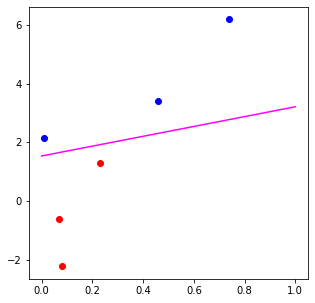

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

def display_random_data2(data, labels, w1, w2, b):                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
  fig = plt.figure(figsize = (5, 5))
  axs = plt.axes()
  x = [0] * 2
  y = [0] * 2
  x[0] = 0
  x[1] = 1
  y[0] = (-(w1 * x[0])-b)/w2
  y[1] = (-(w1 * x[1])-b)/w2
  plt.plot(x, y, "magenta")
  for i in range(0, data.shape[0]):
    color = "red"
    if labels[i] == 0:
      color = "blue"
    axs.scatter(data[i][0], data[i][1], c = color)

w1 = 1.7078354
w2 = -1.01765782
b = 1.55928224
test_data = np.array([[ 0.73920212,  6.19153818],
 [ 0.45822348,  3.3948902 ],
 [ 0.08099486, -2.23494688],
 [ 0.23137049,  1.27617039],
 [ 0.00978608,  2.14460088],
 [ 0.06896728, -0.62826494]])
test_labels = np.array([0, 0, 1, 1, 0, 1])
display_random_data2(test_data, test_labels, w1, w2, b)

**Gradients**
* A ML model is trained by an iterative approach, this means the model when it is trained, it adjusts its weights to minimize the loss (loss is the difference between the prediciton, and the actual label) at each input using a gradient
* The gradient of a model depends on the loss function it uses, since it is usually the derivative of the loss function being used
**Loss Functions**
* This iterative approach uses gradients, these gradients first of all use a loss fucntion to calculate the loss, there's several different loss functions that can be used depending on the problem at hand, such eqautions include but are not limited to
* Mean Squared Error
$\frac{1}{m}‎{{‎‎\sum}}_{i=1}^{m‎}\frac{1}{2}(x^{(i)^T}w-y{(i)})$
  * The derivative is $\frac{1}{m}{{‎‎\sum}}_{i=1}^{m‎}x^{(i)}(x^{(i)^T}w-y{(i)})$ (gradient)
* Binary cross entropy
$-ylog(a)-(1-y)log(1-a)$ (which produces an output between 0 or 1)
  * The derivative is $y-a$ (gradient)
  * also a goes through the sigmoid function usually $a = \frac{1}{1+e^{-x}}$

**Gradient Descent**
* Is used to update the weights and bias of the model by iteratively moving in the direction of steepest decrease in the loss function
* Learning rate is a scalar number that multiplies the gradient, this in turn allows for the gradient descent to be adjusted very fast, or very slow, depending on the number of the gradient, .0001 is a slow learning rate, 2.5 is a fast learning rate
* There's different ways of handling gradient descent some include
  * Stochastic Gradient Descent (uses a batch size of 1 for each iteration)
  * Mini-Batch Gradient Descent (uses between 10-100 batches per iteration)
  * A batch is a set number of data used to train the model
  

**3) Building a model**

**Layers**
* These are the basic building blocks of neural networks
* They contain the weights, and one or several tensors learned
* There are several different types of layers
  * Dense layers, are densely connected, which are usually used to proccess simple vector data, using 2D tensors
  * Recurrent layers are used to handle 3D tensors
  * 2D Convolutional layers are used to handle 4D tensor data
* ReLU is used to apply recitfied linear units to the model 

**Here's an example of a model being created and layers being added to it using keras**


In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
model.add(layers.Dense(10, activation='softmax'))


**Convnet**
* Convolutional Neural Networks
* A CNN is designed specifically to cassify images
* The model takes each pixel of an image an learns how to derive specific information from that
* These features for example can be certain outlines in an image, and then those outlines are recognized as specific parts of an item
  * For example to recognize a car, the outlines can be separated and then recognized as speicifc parts, such as the wheels, windows, lights, etc.
  * Then using fully connected layers and the data the model labels the object as a car, or specific model of car
* Convolutions have two parameters
  * Size of the tiles extracted
  * Depth of the output feature map
* Maxpooling
  * Is a filter in a CNN that takes the matrix and creates a smaller matrix created from the largest numbers in each chunk of the original matrix
* Pre trained convnets can also be used in keras, these can speed up the process when creating a model
  * These include
  * VGG16
  * VGG19
  * Xception


**4) Compiling a model**
* After the model is built, the next step is to compile it, this usually takes a few steps, unless the model requires severe specifications for this reason several things can be altered on the model when it is to be compiled
* Loss function
  * Here it's the same as before, the loss function determines the exact number that the model needs to minimize to know it is being more accurate
  * In keras it can include Mean Squared Error, Binary Cross Entropy, etc.
* Optimizers
 * Setting this up allows you to specifiy a specific variant of Stochastic Gradient Descent
 * Learning Rate is specified in the optimizer in keras, however changing it to a specific value is easy, all you do is edit the optimizer you want to use
  * also as previously stated the smaller the LR the slower the model will update its weights, but it usually provides more accurate results

**Here using the previously established model, here I specify a Learning rate, a loss function, and an optimizer**

In [0]:
from keras import optimizers

# Here the model is compiled using MSE as the loss function, and Stochastic Gradient Descent as the optimizer
model.compile(loss='mean_squared_error', optimizer='sgd')

# Here the model is compiled usong MSE and SGD, but with a specific learning rate,
# each optimizer however has its own way of specifing the components , this one is for Stochastic Gradient Descent
sgd = optimizers.SGD(learning_rate = 0.01)
model.compile(loss='mean_squared_error', optimizer=sgd)

**5)Training a model**
**Training**
* Data
  * Training a model requires a set of data that the model can use, this includes a set of data that contains the inputs of the weights, and a set of data that contains the labels for each specific input
  * These are also usually split into validation and test data, meaning that you end up with 4 different arrays of data (for supervised learning since you need to provide the labels to the model)
    * train_data (the inputs that the model uses to create a prediciton) 
    * train_labels (the labels that the model has to match its predictions with)
    * test_data (same as train_data, but used to validate the accuracy of the model)
    * test_labels (same as train_labels, but again used to validate the models accuracy) 

* The model using the specified data trains itself by adjusting the weights of the model, by comparing inputing its prediction through the specified loss function
* The model can also be specified to be trained in a specific sized batch and how many epichs it has to go through to finish training, the more epochs the longer, but possibly more accurate the model can be

**Here's an example of code that would be used to train the previous model we established**

In [0]:
# train_data and train_labels are not specified so do not run code
model.fit(train_data, train_labels, epochs)

**Validation Sets**
* Some problems can be derived through training a model specifically overfitting and underfitting, accuracy is used to fix these.
* Overfitting
  * This problem means that the model is too good at predicitng the train data, but not any other data
  * The model can't generalize its predicitons
  * The model is more complex than it should be
  * The model can't predict new data well
* Underfitting
  * Is when the model has not been trained enough
  * The model is not accurate
  * The model again can't predict new or old data
* Validation sets are created to help fix both of these problems
 * As previously mentioned the data is separated into a test_data, and test_label array, with a validation model you would split these two into two more sets, the validation_data, and validation_labels
 * These are used to check the model and check if the model is accurate on these tests
 * The workflow is essentially this
  * Pick the model that does best on the validation sets, and then check it once more against the test set
  * This in turn prevents more exposure to the full data set making the model more general
 * There are many different types of validation models, some are
  * Hold-out validation
    * this one is very basic essentially what I explained before
  * K-fold validation
    * this one is used when there's little data available
    * you partition the data set into several folds (sub arrays of the data)
    * in each partition a different fold becomes the test data
    * essentially its a giant for loop for training data

**6) Finetuning pre trained models**
* The pre trained models we dealt in class were convnets
* Fine tuning a convnet
  * Pick convnet
    * VGG16, Xception, VGG19, etc.
  * Figure out naming scheme
    * You can probably find the documentation for the names of each layer, however i found it to be easier to just print the layer names with a for loop
  * using the layer.name() command

**Here's how I obtained the names for the xception layers**

In [1]:
from keras.applications import Xception

conv_base = Xception(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(150, 150, 3))
# warning running this code produces a very long output
for layer in conv_base.layers:
  print(layer.name)

Using TensorFlow backend.


83689472/83683744 [==============================] - 2s 0us/step
input_1
block1_conv1
block1_conv1_bn
block1_conv1_act
block1_conv2
block1_conv2_bn
block1_conv2_act
block2_sepconv1
block2_sepconv1_bn
block2_sepconv2_act
block2_sepconv2
block2_sepconv2_bn
conv2d_1
block2_pool
batch_normalization_1
add_1
block3_sepconv1_act
block3_sepconv1
block3_sepconv1_bn
block3_sepconv2_act
block3_sepconv2
block3_sepconv2_bn
conv2d_2
block3_pool
batch_normalization_2
add_2
block4_sepconv1_act
block4_sepconv1
block4_sepconv1_bn
block4_sepconv2_act
block4_sepconv2
block4_sepconv2_bn
conv2d_3
block4_pool
batch_normalization_3
add_3
block5_sepconv1_act
block5_sepconv1
block5_sepconv1_bn
block5_sepconv2_act
block5_sepconv2
block5_sepconv2_bn
block5_sepconv3_act
block5_sepconv3
block5_sepconv3_bn
add_4
block6_sepconv1_act
block6_sepconv1
block6_sepconv1_bn
block6_sepconv2_act
block6_sepconv2
block6_sepconv2_bn
block6_sepconv3_act
block6_sepconv3
block6_sepconv3_bn
add_5
block7_sepconv1_act
block7_sepconv1


  * Now that we have the layer names we can proceed with the next step
  * Freezing Layers
    * To fine tune a convnet, you have to freeze all the layers in the convnet and test to see how accurate the model is, if it is not accurate enough you proceed with the actual fine-tuning
  * Unfreezing layers
    * To fine tune a convnet you have to unfreeze an amount of layers of your choice
    * Unfreezing the layers allows the model to change the convnet to better fit the model you are using

**Here's an example of freezing the layers, and then unfreezing a specific amount**

In [0]:
# Freezing the layers
conv_base.trainable = False

# Unfreezing the layers
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block3_pool': # any layer after block3_pool will be trainable
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False